## Import Modules

In [1]:
import Tools
import Dataset as ds

import numpy as np
import torch
from ultralytics import settings
from ultralytics import YOLO


# Module Config

In [2]:
# Ultralytics settings
#print(settings) 

# GPU Utilisation
#print(torch.cuda.is_available())
device = torch.device("cuda")

## Load Dataset

In [3]:
# Base paths for the images and labels
train_images_path = 'datasets/AVOIDDS/images/train'
train_labels_path = 'datasets/AVOIDDS/labels/train'
val_images_path = 'datasets/AVOIDDS/images/valid'
val_labels_path = 'datasets/AVOIDDS/labels/valid'

# Base path for metadata
metadata_path = 'datasets/AVOIDDS/metadata.json'

# Create the DataFrames for the train and validation sets
train_df = ds.create_dataframe(train_images_path, train_labels_path, metadata_path)
valid_df = ds.create_dataframe(val_images_path, val_labels_path, metadata_path)

#train_df.info()

# Create sub datasets

In [4]:
# TEST - cessna only dataset test

test_train_df = train_df[train_df['ac'] == 'Cessna Skyhawk']
test_valid_df = valid_df[valid_df['ac'] == 'Cessna Skyhawk']

dataset_name = 'cessna_only'

ds.create_sub_dataset(dataset_name, test_train_df, test_valid_df)

Removing dataset if pre-existing
Copying training files:


Copying files:   0%|          | 0/43200 [00:00<?, ?it/s]

Copying validation files:


Copying files:   0%|          | 0/4800 [00:00<?, ?it/s]

Dataset 'cessna_only' created at datasets/


# Create Augmented Datasets

In [5]:
test_dataset_dir = "datasets/cessna_only"

"""
Methods: 
 - flip
 - rotate
 - bnc
 - gaussian
 - histEq
 - whiteBal
 - sharpen
 - zoom

"""

augmentation_metadata = {
    'methods': {
        'flip': {
            'parameters': {
                'orientation': 'h',  # Could be 'h' for horizontal or 'v' for vertical
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 50% of the training images
        },
        'rotate': {
            'parameters': {
                'angle': 90,  # Rotation angle
                'p': 1.0  # Probability of applying the augmentation
            },
            'apply_to_percentage': 0.1  # 30% of the training images
        }
    }
}

ds.augment_dataset(test_dataset_dir, augmentation_metadata)

Removing existing directories/files:   0%|          | 0/3 [00:00<?, ?it/s]

Copying files:   0%|          | 0/21600 [00:00<?, ?it/s]

Copying files:   0%|          | 0/21600 [00:00<?, ?it/s]

Applying augmentations:   0%|          | 0/4320 [00:00<?, ?it/s]

An error occurred: Expected y_max for bbox (0.23743350000000002, 0.784257, 0.5908465, 1.019865, 0) to be in the range [0.0, 1.0], got 1.019865.
An error occurred: Expected y_max for bbox (0.26918549999999997, 0.7080895, 0.7081584999999999, 1.0007385, 0) to be in the range [0.0, 1.0], got 1.0007385.


# Test Augmentation Methods

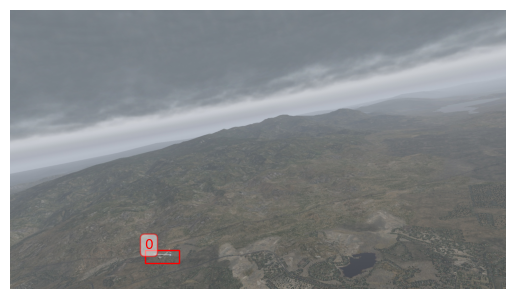

In [6]:
# TEST - block to test aug methods

image = '23880'
dataset = 'train-aug'
aug_type = 'flip'

test_image_path = f'datasets/cessna_only/images/{dataset}/{image}.jpg'
test_label_path = f'datasets/cessna_only/labels/{dataset}/{image}.txt'

aug_image_path = f'datasets/cessna_only/images/{dataset}/{image}-{aug_type}.jpg'
aug_label_path = f'datasets/cessna_only/labels/{dataset}/{image}-{aug_type}.txt'

Tools.overlay_bbox_image(aug_image_path, aug_label_path)

# Test Parameters

In [7]:
# parameters for each specfic test














# Training